### 1) Give three reasons why water vapor is important for weather and climate. 
1. Water vapor is necessary for precipitation to occur. Put simply, water becomes water vapor (the gaseous form) with heat, which is able to rise until it condenses and then falls back to Earth as precipitation. This has implications for the water cycle, since precipitation provides water to regions not near any fixed bodies of water since clouds can move.
2. Water vapor is also an important factor in the rate at which water evaporates. As demonstrated in our evaporation/evapotranspiration formulas, it is easier for water to evaporate in dry environments (less relative humidity) than moist environments (high relative humidity)
3. As mentioned before, water vapor forms clouds. Aside from precipitation, clouds affect weather by reflecting incoming solar radiation/sunlight. This definitely affects temperature and climate

### 2) Define the following terms:
- Specific humidity: the specific mass of water vapor in a specific mass of air
- Mixing ratio of water vapor
- Transpiration
- What factors influence the land evapotranspiration rate?
- What factors influence evaporation over the ocean?


### 3) Causius-Clapeyron

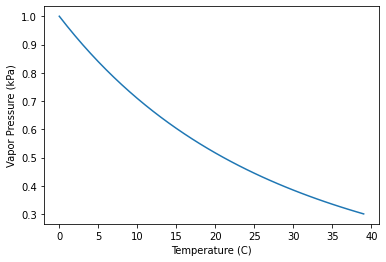

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This function calculates the vapor pressure of water at a given temperature, using the Clausius-Clapeyron equation.
# The equation is as follows: e = 0.611 ** ((17.502 * T) / (240.97 + T))
# Where e is the vapor pressure in kPa, and T is the temperature in degrees Celsius.
def clausius_clapeyron(T): 
    return 0.611 ** ((17.502 * T) / (240.97 + T))

# This function plots a the vapor pressure along a range of temperatures
# Temperatures should be in degrees Celcius
def plot_range(start, end):
    temperatures = np.arange(start, end, 1)
    vapor_pressures = [clausius_clapeyron(t) for t in temperatures]

    plt.plot(temperatures, vapor_pressures)
    plt.xlabel("Temperature (C)")
    plt.ylabel("Vapor Pressure (kPa)")
    plt.show()

plot_range(0, 40)

### 4) Latent Heat
1. For one square meter with a depth of 1 meter, we know that we have 1 $m^3$ of water, which is equal to 1000 kg in mass. Therefore, we can calculate the energy required, x, as $x = 1000 kg * (2.5 * 10^6 J/kg) = 2.5 * 10^9 J$
<br>
Therefore, one would need $2.5 * 10^9 J$ to evaporate one cubic meter of swamp water.
2. To calculate the rate of energy, we must use the equation rate = required energy / time (in seconds). Therefore, let us calculate, assuming 31,536,000 seconds in a year. Therefore, when r is rate, $r = 2.5 * 10^9 J / 31,536,000 s = 79.4 J/s/m^2 = 79.4 W/m^2$. Therefore, the rate is $79.4 W/m^2$
3. $\frac{79.4 W/m^2}{342 W/m^2}$, which simplifies to $\approx 0.23 W/m^2$

### 5) Evaporation